In [1]:
import numpy as np
import pandas as pd
import re
train = pd.read_csv('data/train_data.csv')

In [2]:
train.head()

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4


In [14]:
train.title[['한국' in x for x in train.title]]

83             한국당 가짜뉴스 규제는 개인미디어 통제…입법화 반기
91           화웨이 한국 기업 3곳과 5G 생태계 관련 MOU 체결
140        1보 류현진 한국인 첫 MLB 올스타전 선발로 1이닝...
158             김방훈 자유한국당 제주도당위원장 도지사 출마 선언
163             한국 아시아 U18 여자농구 4강에서 중국에 패배
                        ...                
45553            한국문학 앤솔로지 영문판 제1권 은세계 외 출간
45591               임홍조 전 한국출판문화진흥재단 이사장 별세
45635          한국무용협회 예술대상에 박명숙·김근희·김운미·박재근
45647              구글 받아쓰기 앱 시험판 출시…한국어도 지원
45653    2020 한국인터넷기자상 시상식 내달 1일 개최…특별상 김성후
Name: title, Length: 1669, dtype: object

In [27]:
re.search('[^一-龥가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', train.title[1])

<re.Match object; span=(5, 6), match=' '>

In [57]:
special_word = pd.DataFrame()

In [61]:
#불용어를 통하여 이상한 단어가 들어간 기사
#특수문자로 인하여 컬럼별 일정하지 않은점
#한글자 제거는 불용어 연장선
for j in range(0,7):
    a = [train.title[x] if re.search('[^一-龥가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z ]', train.title[x])  and train.topic_idx[x] == j else '' for x in range(len(train.title))]
    special_word[str(j)] = [len(np.unique(a))]

In [62]:
special_word

,0,1,2,3,4,5,6
0,3425,4730,4373,3988,4986,5386,4166


<AxesSubplot:>

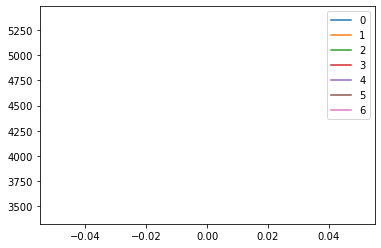

In [63]:
import matplotlib as mpl
import matplotlib.pyplot as plt